In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [5]:
train.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

**데이터 시각화**

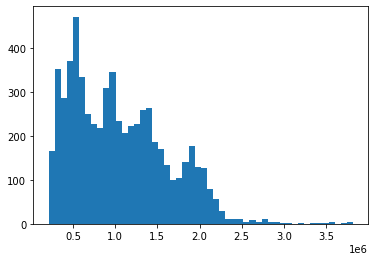

In [6]:
import matplotlib.pyplot as plt

plt.hist(train.Weekly_Sales, bins=50)
plt.show()

컴퓨터는 숫자 데이터만 인식 가능하다. 
<br>
따라서 문자, 날짜, 결측치 등을 숫자로 바꾸는 데이터 전처리가 필요하다.

In [8]:
#결측치 처리
train = train.fillna(0)
train.isnull().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
Weekly_Sales    0
dtype: int64

In [9]:
#date 처리
train["Date"]


0       05/02/2010
1       12/02/2010
2       19/02/2010
3       26/02/2010
4       05/03/2010
           ...    
6250    31/08/2012
6251    07/09/2012
6252    14/09/2012
6253    21/09/2012
6254    28/09/2012
Name: Date, Length: 6255, dtype: object

In [11]:
def get_month(date):
    month = int(date[3:5])
    return month

train['Month'] = train['Date'].apply(get_month)
train.head()    

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month
0,1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90,2
1,2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44,2
2,3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17,2
3,4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59,2
4,5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68,3


In [14]:
#isHolyday전처리: bool은 컴퓨터 파악 가능하지만 연습삼아 전처리
def holyday(isholyday):
    if isholyday == True:
        num = 1
    else:
        num = 0
    return num

train["NumberHoliday"] = train["IsHoliday"].apply(holyday)

train.head()


,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90,2,0
1,2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44,2,1
2,3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17,2,0
3,4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59,2,0
4,5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68,3,0


In [15]:
#test데이터 전처리
test = test.fillna(0)

In [16]:
test['Month'] = test['Date'].apply(get_month)


In [17]:
test['NumberHoliday'] = test["IsHoliday"].apply(holyday)

**선형회귀모델링**


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
# 필요없는 컬럼 제거
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

train = train.drop(columns=['Date','IsHoliday'])
test = test.drop(columns=['Date','IsHoliday'])

# y 제거
X_train = train.drop(columns=['Weekly_Sales'])
y_train = train['Weekly_Sales']

In [21]:
#모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [22]:
#결과값 예측 by predict

prediction = model.predict(test)
print("----------------상위 10개값------------------------")
print(prediction[:10])

----------------상위 10개값------------------------
[1481332.55782774 1461330.0803101  1387783.09207983 1389854.53005948
 1443978.94274371 1514601.15440917 1416193.17838576 1439121.7459541
 1334090.21769005 1324831.19678272]


In [23]:
submission['Weekly_Sales'] = prediction

submission.head()

,id,Weekly_Sales
0,1,1.481333e+06
1,2,1.461330e+06
2,3,1.387783e+06
3,4,1.389855e+06
4,5,1.443979e+06


In [24]:
submission.to_csv('submission.csv', index=False)
